# pandas-基本功能

## 教學目標

這份教學的目標是介紹基本的 pandas 功能，並學習快速操作大量的資料。

## 適用對象

適用於有程式基礎，且擁有 python 和 `numpy` 基礎的學生。

若沒有先學過 python，請參考 [python-入門語法](./python-入門語法.ipynb) 教學。

若沒有先學過 `numpy`，請參考 [numpy-基本功能](./numpy-基本功能.ipynb) 教學。

## 執行時間

本教學全部執行時間約為 1.3843801021575928 秒。

|測試環境|名稱|
|-|-|
|主機板|X570 AORUS ELITE|
|處理器|AMD Ryzen 7 3700X 8-Core Processor|
|記憶體|Kingston KHX3200C16D4/16GX|
|硬碟|Seagate ST1000DM003-1ER1|
|顯示卡|GeForce RTX 2080|
|作業系統|Ubuntu 18.04 LTS|

## 大綱

- [簡介](#簡介)
- [安裝](#安裝)
- [資料結構](#資料結構)
- [操作資料](#操作資料)
- [讀取資料](#讀取資料)
- [練習](#練習)

## 簡介

根據 [pandas 官方網站](https://pandas.pydata.org/)（v1.0）：

> pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
built on top of the Python programming language.
>
> pandas 是基於 python 開發的一個快速、強大、具有彈性且容易使用的開源資料分析與操作工具。

`pandas` 提供**讀取**或**輸出**以下資料格式的功能：

- CSV
- JSON
- HTML
- Microsoft Excel
- OpenDocument Excel
- SQL databases
- pickle
- Google BigQuery

讀取資料後，`pandas` 能夠對資料進行以下的操作：

- **索引（Index**）與**選取（Select）** 資料
- **合併（Merge）**、**結合（Join）** 與**串接（Concatenate）** 資料
- **統計（Statistic）** 與**視覺化（Visualization）**

## 安裝

透過 `pip` 安裝 `pandas`：

```sh
pip install pandas
```

In [12]:
# 匯入 pandas 模組

import pandas as pd

# 匯入 numpy 模組

import numpy as np

## 資料結構

由於 `pandas` 是基於 python 與 `numpy` 進行開發，所以 `pandas` 也使用了 `numpy` 中的概念：

- 維度：`pandas.Series.shape` 即 `numpy.shape`
- 資料型態：`pandas.Series.dtype` 即 `numpy.dtype`

### Series

`pandas.Series` 為**維度為 1**且**資料型態皆相同**的結構。

- 操作方法與操作 `numpy.ndarray` 陣列相同
    - 使用 `[位置]` 取值
    - 使用 `[起始位置:結束位置]` 取連續值
        - 包含起始位置
        - **不包含**結束位置
- 可以給予每個 `pandas.Series` 位置中的值一個名字
    - 使用 `index` 參數進行命名
    - 使用 `[index 名稱]` 取值
    - 使用 `[起始 index 名稱:結束 index 名稱]` 取連續值
        - 包含起始位置
        - **包含**結束位置
- 可以給予 `pandas.Series` 一個名字
    - 使用 `name` 參數進行命名
- 透過給予名稱讓資料具有**可閱讀性**

### DataFrame

`pandas.DataFrame` 為**維度為 2**，**資料型態不一定相同**的結構。

- 由一個或多個 `pandas.Series` 所組成
- 以**表格**的方式呈現與操作（如同 SQL）
    - 使用**行（row）** 與**列（column）** 進行操作
    - 每列都會自動被轉換成 `pandas.Series`
- 取值方法
    - 先選擇**行（column）**，再使用**列的位置（row position）**取值
        - 同 `pandas.Series` 的操作方式
    - 先選擇**列（row position）**，再使用**行的位置（column position）** 或**名稱（column index）** 取值
        - 必須使用 `pandas.DataFrame.iloc[位置]`
    - 先選擇**列的名稱（row index）**，再使用**行的位置（column position）** 或**名稱（column index）** 取值
        - 使用 `index` 參數進行命名
        - 必須使用 `pandas.DataFrame.loc[名稱]`
    - 支援連續取值，與 `pandas.Series` 操作方法相同
- 透過給予名稱讓資料具有**可閱讀性**

In [13]:
# Series

# 宣告 Series 變數
s1 = pd.Series([1, 2, 3])    

# 輸出 Series s1
print(s1)                    
print()
# s1 型態為 Series，輸出 True
print(type(s1) == pd.Series) 
# s1 中的數值型態為整數，輸出 int64
print(s1.dtype)              
# s1 維度為 1，共 3 個數值，輸出 (3,)
print(s1.shape)              
print()

s2 = pd.Series([1., 2., 3.])

# 輸出 Series s2
print(s2)                    
print()
# s2 型態為 Series，輸出 True
print(type(s2) == pd.Series) 
# s2 中的數值型態為浮點數，輸出 float64
print(s2.dtype)             
# s2 維度為 1，共 3 個數值，輸出 (3,)
print(s2.shape)             

0    1
1    2
2    3
dtype: int64

True
int64
(3,)

0    1.0
1    2.0
2    3.0
dtype: float64

True
float64
(3,)


In [14]:
# 宣告 Series 變數
s3 = pd.Series(        
    [1, 2, 3,],
    index=['1st', '2nd', '3rd'],
    name='my series'
)

# 輸出 Series s3
print(s3)             
print()
# 輸出 Series s3 的名字 my series
print(s3.name)         
# 依序輸出 Series s3 中所有值名字
print(s3.index)        
print()

# 輸出 Series s3 位置 0 的值
print(s3[0])           
# 輸出 Series s3 中名稱為 1st 的值
print(s3['1st'])       
# 輸出 Series s3 位置 1 的值
print(s3[1])           
# 輸出 Series s3 中名稱為 2nd 的值
print(s3['2nd'])       
# 輸出 Series s3 位置 2 的值
print(s3[2])           
# 輸出 Series s3 中名稱為 3rd 的值
print(s3['3rd'])       
print()

# 輸出 Series s3 位置 0, 1 但不包含位置 2 的值
print(s3[0:2])         
print()
# 輸出 Series s3 名稱為 1st 的值位置到名稱為 3rd 的值位置
# 與 list 不同，包含 3rd 的位置
print(s3['1st':'3rd']) 

1st    1
2nd    2
3rd    3
Name: my series, dtype: int64

my series
Index(['1st', '2nd', '3rd'], dtype='object')

1
1
2
2
3
3

1st    1
2nd    2
Name: my series, dtype: int64

1st    1
2nd    2
3rd    3
Name: my series, dtype: int64


In [15]:
# DataFrame

# 宣告 DataFrame 變數
df1 = pd.DataFrame({ 
    'col1': [1, 2, 3, 4],
    'col2': [5., 6., 7., 8.],
    'col3': ['a', 'b', 'c', 'd']
})

# 輸出 DataFrame df1
print(df1)                            
print()
# df1 型態為 DataFrame，輸出 True
print(type(df1) == pd.DataFrame)      

# 輸出 DataFrame df1 名稱為 col1 的行
print(df1['col1'])                    
print()
# df1['col1'] 型態為 Series，輸出 True
print(type(df1['col1']) == pd.Series) 
# df1['col1'] 中的數值型態為整數，輸出 int64
print(df1['col1'].dtype)              
# df1['col1'] 維度為 1，共 4 個數值，輸出 (4,)
print(df1['col1'].shape)              
print()

# 輸出 DataFrame df1 名稱為 col2 的行
print(df1['col2'])                    
print()
# df1['col2'] 型態為 Series，輸出 True
print(type(df1['col2']) == pd.Series) 
# df1['col2'] 中的數值型態為浮點數，輸出 float64
print(df1['col2'].dtype)              
# df1['col2'] 維度為 1，共 4 個數值，輸出 (4,)
print(df1['col2'].shape)             
print()

# 輸出 DataFrame df1 名稱為 col3 的行
print(df1['col3'])                    
print()
# df1['col3'] 型態為 Series，輸出 True
print(type(df1['col3']) == pd.Series) 
# df1['col3'] 中的數值型態為字串，輸出 object
print(df1['col3'].dtype)              
# df1['col3'] 維度為 1，共 4 個數值，輸出 (4,)
print(df1['col3'].shape)              

   col1  col2 col3
0     1   5.0    a
1     2   6.0    b
2     3   7.0    c
3     4   8.0    d

True
0    1
1    2
2    3
3    4
Name: col1, dtype: int64

True
int64
(4,)

0    5.0
1    6.0
2    7.0
3    8.0
Name: col2, dtype: float64

True
float64
(4,)

0    a
1    b
2    c
3    d
Name: col3, dtype: object

True
object
(4,)


In [16]:
# 宣告 DataFrame 變數
df2 = pd.DataFrame(           
    { 
        'col1': [1, 2, 3, 4],
        'col2': [5., 6., 7., 8.],
        'col3': ['a', 'b', 'c', 'd']
    },
    index=['row1', 'row2', 'row3', 'row4']
)

print(df2)
print()

# 輸出 DataFrame df2 第 0 列
print(df2.iloc[0])            
print()
# 輸出 DataFrame df2 名稱為 row1 的列
print(df2.loc['row1'])        
print()
# 輸出 DataFrame df2 第 1 列
print(df2.iloc[1])            
print()
# 輸出 DataFrame df2 名稱為 row2 的列
print(df2.loc['row2'])      
print()
# 輸出 DataFrame df2 第 2 列
print(df2.iloc[2])            
print()
# 輸出 DataFrame df2 名稱為 row3 的列
print(df2.loc['row3'])       
print()

# 輸出 DataFrame df2 第 0, 1 列
print(df2.iloc[0:2])          
print()
# 輸出 DataFrame df2 列的名稱為 row1 的位置
# 到列的名稱為 row3 的位置的所有列
# 與 list 不同，包含 row3 的位置
print(df2.loc['row1':'row3'])                               

      col1  col2 col3
row1     1   5.0    a
row2     2   6.0    b
row3     3   7.0    c
row4     4   8.0    d

col1    1
col2    5
col3    a
Name: row1, dtype: object

col1    1
col2    5
col3    a
Name: row1, dtype: object

col1    2
col2    6
col3    b
Name: row2, dtype: object

col1    2
col2    6
col3    b
Name: row2, dtype: object

col1    3
col2    7
col3    c
Name: row3, dtype: object

col1    3
col2    7
col3    c
Name: row3, dtype: object

      col1  col2 col3
row1     1   5.0    a
row2     2   6.0    b

      col1  col2 col3
row1     1   5.0    a
row2     2   6.0    b
row3     3   7.0    c


## 操作資料

### 資料資訊（Data Information）

`pandas` 提供簡單的函數能夠快速瀏覽資料的資訊：

|函數|意義|
|-|-|
|`pandas.DataFrame.info`|資料型態與大小|
|`pandas.(DataFrame\|Series).head`|前 n 筆資料|
|`pandas.(DataFrame\|Series).tail`|後 n 筆資料|
|`pandas.(DataFrame\|Series).describe`|統計資訊|
|`pandas.(DataFrame\|Series).hist`|繪出直方圖|

### 資料前處理（Data Preprocessing）

有時後部份資料會遺失或是有誤（例如型態錯誤），這時就必須要進行資料前處理。

在 `pandas` 中不存在或遺失的值以 `None` 表示，若資料欄位為浮點數則改用 `numpy.nan` 表示。

|函數|意義|
|-|-|
|`pandas.(DataFrame\|Series).isna`|列出不存在或遺失的資料|
|`pandas.(DataFrame\|Series).notna`|列出存在的資料|
|`pandas.(DataFrame\|Series).dropna`|去除不存在或遺失的資料|
|`pandas.(DataFrame\|Series).fillna`|對不存在或遺失的資料覆寫指定數值|

處理遺失資料的策略為

1. 找到遺失的資料
2. 若與該資料相同的數值有某些**簡單**或是**可預測**的值，則以**覆寫**遺失值
    - 若資料為**數字**，則可以填入**平均值**或是**中位數**
    - 若資料為**類別**，則可以填入**出現次數最多的類別**
3. 若無法處理，則**丟棄**資料

### 取得資料（Select Data）

使用條件運算子對 `pandas.Series` 進行運算，並回傳 `dtype` 為 `bool` 的 `pandas.Series`。

可以進一步在使用回傳的 `pandas.Series` 取出 `pandas.DataFrame` 中的符合條件的資料列（row）。

### 資料運算（Data Operation）

使用 `pandas` 內建的運算功能進行資料運算，基本上與 `numpy.ndarray` 所提供的功能相同。

若需要客制化每一筆資料的運算，則使用 `pandas.(DataFrame|Series).apply`。

- `axis=0` 為行（column）方向運算，預設為 `axis=0`
- `axis=1` 為列（row）方向運算

|函數|意義|
|-|-|
|`pandas.(DataFrame\|Series).add`|每筆資料進行加法|
|`pandas.(DataFrame\|Series).sub`|每筆資料進行減法|
|`pandas.(DataFrame\|Series).mul`|每筆資料進行乘法|
|`pandas.(DataFrame\|Series).div`|每筆資料進行除法|
|`pandas.(DataFrame\|Series).max`|取出資料中最大值|
|`pandas.(DataFrame\|Series).min`|取出資料中最小值|
|`pandas.Series.argmax`|取出資料中最大值的位置|
|`pandas.Series.argmin`|取出資料中最小值的位置|
|`pandas.Series.idxmax`|取出資料中最大值的名稱|
|`pandas.Series.idxmin`|取出資料中最小值的名稱|
|`pandas.(DataFrame\|Series).mean`|計算平均數|
|`pandas.(DataFrame\|Series).var`|計算變異數|
|`pandas.(DataFrame\|Series).std`|計算標準差|
|`pandas.(DataFrame\|Series).sum`|計算總和|

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   col-int    11 non-null     int32  
 1   col-float  11 non-null     float64
dtypes: float64(1), int32(1)
memory usage: 260.0 bytes
None

   col-int  col-float
0        0   0.022218
1        1   0.992614
2        2   0.401620

    col-int  col-float
9         9   0.629347
10       10   0.353845

         col-int  col-float
count  11.000000  11.000000
mean    5.000000   0.409199
std     3.316625   0.271594
min     0.000000   0.022218
25%     2.500000   0.283360
50%     5.000000   0.387391
75%     7.500000   0.545690
max    10.000000   0.992614



array([[<AxesSubplot:title={'center':'col-int'}>,
        <AxesSubplot:title={'center':'col-float'}>]], dtype=object)

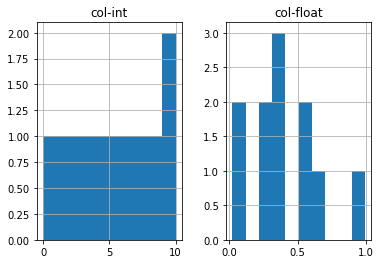

In [17]:
# 資料資訊

# 宣告 DataFrame 變數
df3 = pd.DataFrame({  
    'col-int': np.arange(11),
    'col-float': np.random.rand(11),
})

# 輸出 DataFrame df3 資料型態與大小
print(df3.info())     
print()
# 輸出 DataFrame df3 前 3 筆資料
print(df3.head(3))    
print()
# 輸出 DataFrame df3 後 2 筆資料
print(df3.tail(2))    
print()
# 輸出 DataFrame df3 各行統計數值
print(df3.describe()) 
print()
# 畫出 DataFrame df3 的資料直方圖
df3.hist()            

In [18]:
# 資料前處理

# 宣告 DataFrame 變數
df4 = pd.DataFrame({     
    'numeric': [np.nan, 2, 3, 1, 2, np.nan, 1, np.nan, 3],
    'categorical': ['A', 'B', 'C', 'A', None, 'B', 'A', None, 'C'],
})

# 找出 DataFrame df4 中遺失資料的欄位
print(df4.isna())        
print()
# 找出 DataFrame df4 中沒有遺失資料的欄位
print(df4.notna())       
print()
# 對 df4['numeric'] 中遺失的欄位填入平均值
print(df4['numeric']     
      .fillna(df4['numeric'].mean()))
print()
# 移除 df4['categorical'] 中遺失的欄位
print(df4['categorical'] 
      .dropna())

   numeric  categorical
0     True        False
1    False        False
2    False        False
3    False        False
4    False         True
5     True        False
6    False        False
7     True         True
8    False        False

   numeric  categorical
0    False         True
1     True         True
2     True         True
3     True         True
4     True        False
5    False         True
6     True         True
7    False        False
8     True         True

0    2.0
1    2.0
2    3.0
3    1.0
4    2.0
5    2.0
6    1.0
7    2.0
8    3.0
Name: numeric, dtype: float64

0    A
1    B
2    C
3    A
5    B
6    A
8    C
Name: categorical, dtype: object


In [19]:
# 取得資料

# 宣告 DataFrame 變數
df5 = pd.DataFrame({              
    # 名字
    'name': ['Alice', 'Beth',
             'Carl', 'Dennis'],   
    # 年紀
    'age': [18, 30, 24, 40],      
    # 性別
    'sex': ['F', 'F', 'M', 'M'],  
})

# 找出大於 25 歲的資料
print(df5['age'] > 25)            
print()
# 取出大於 25 歲的資料
print(df5[df5['age'] > 25])       
print()

# 找出性別為女性的資料
print(df5['sex'] == 'F')          
print()
# 取出性別為女性的資料
print(df5[df5['sex'] == 'F'])     
print()

# 找出年紀大於 25 歲且性別為女性的資料
print((df5['age'] > 25)           
      &
      (df5['sex'] == 'F'))
print()
# 取出年紀大於 25 歲且性別為女性的資料
print(df5[                        
    (df5['age'] > 25)
    &
    (df5['sex'] == 'F')
])

0    False
1     True
2    False
3     True
Name: age, dtype: bool

     name  age sex
1    Beth   30   F
3  Dennis   40   M

0     True
1     True
2    False
3    False
Name: sex, dtype: bool

    name  age sex
0  Alice   18   F
1   Beth   30   F

0    False
1     True
2    False
3    False
dtype: bool

   name  age sex
1  Beth   30   F


In [20]:
# 資料運算

# 宣告 DataFrame 變數
df6 = pd.DataFrame( 
    {
        'year': [1995, 1989, 1947],
        'month': [10, 6, 2],
        'date': [12, 4, 28],
    }, 
    index=['my birthday', '64', '228']
)

# 將 DataFrame df6 中所有數值加 3
print(df6.add(3))            
print()
# 將 DataFrame df6 中所有數值減 5
print(df6.sub(5))            
print()
# 將 DataFrame df6 中所有數值乘 7
print(df6.mul(7))            
print()
# 將 DataFrame df6 中所有數值除 9
print(df6.div(9))            
print()
# 找出 DataFrame df6 中每一行的最大值
print(df6.max())             
print()
# 找出 DataFrame df6 中每一行的最小值
print(df6.min())             
print()
# 找出 Series df6['year'] 中最大值的位置
print(df6['year'].argmax())  
# 找出 Series df6['month'] 中最小值的位置
print(df6['month'].argmin()) 
# 找出 Series df6['year'] 中最大值的名稱
print(df6['year'].idxmax())  
# 找出 Series df6['date'] 中最小值的名稱
print(df6['date'].idxmin())  
print()
# 計算 DataFrame df6 中每一行的平均值
print(df6.mean())            
print()
# 計算 DataFrame df6 中每一行的變異數
print(df6.var())             
print()
# 計算 DataFrame df6 中每一行的標準差
print(df6.std())             
print()
# 計算 DataFrame df6 中每一行的總和
print(df6.sum())             

             year  month  date
my birthday  1998     13    15
64           1992      9     7
228          1950      5    31

             year  month  date
my birthday  1990      5     7
64           1984      1    -1
228          1942     -3    23

              year  month  date
my birthday  13965     70    84
64           13923     42    28
228          13629     14   196

                   year     month      date
my birthday  221.666667  1.111111  1.333333
64           221.000000  0.666667  0.444444
228          216.333333  0.222222  3.111111

year     1995
month      10
date       28
dtype: int64

year     1947
month       2
date        4
dtype: int64

0
2
my birthday
64

year     1977.000000
month       6.000000
date       14.666667
dtype: float64

year     684.000000
month     16.000000
date     149.333333
dtype: float64

year     26.153394
month     4.000000
date     12.220202
dtype: float64

year     5931
month      18
date       44
dtype: int64


In [21]:
import datetime

# 宣告 DataFrame 變數
df7 = pd.DataFrame({                
    # 名字
    'name': ['Alice', 'Beth',
             'Carl', 'Dennis'],     
    # 年紀
    'age': [18, 30, 24, 40],        
    # 性別
    'sex': ['F', 'F', 'M', 'M'],    
})

# 計算出生西元年
def birth_year(age):                
    return datetime.date.today().year - age

# 根據性別輸出 Female 或 Male
def sex_str(sex):                   
    return 'female' if sex == 'F' else 'male'

# 將資料轉換成可閱讀的資訊
def info_str(row):                  
    return '{} is a {} and was born at {}.'.format(
        row['name'],
        sex_str(row['sex']),
        birth_year(row['age'])
    )

# 輸出出生西元年
print(df7['age'].apply(birth_year)) 
print()
# 輸出性別
print(df7['sex'].apply(sex_str))    
print()
# 輸出可閱讀的資訊
print(df7.apply(info_str, axis=1))  

0    2003
1    1991
2    1997
3    1981
Name: age, dtype: int64

0    female
1    female
2      male
3      male
Name: sex, dtype: object

0    Alice is a female and was born at 2003.
1     Beth is a female and was born at 1991.
2       Carl is a male and was born at 1997.
3     Dennis is a male and was born at 1981.
dtype: object


## 讀取資料

使用 `pandas.read_*` 進行讀取特定資料格式，同時支援輸出部份格式：

|格式|讀取函數|輸出函數|
|-|-|-|
|CSV|`pandas.read_csv`|`pandas.to_csv`|
|JSON|`pandas.read_json`|`pandas.to_json`|
|HTML|`pandas.read_html`|`pandas.to_html`|
|Excel|`pandas.read_excel`|`pandas.to_excel`|
|SQL|`pandas.read_sql`|`pandas.to_sql`|
|pickle|`pandas.read_pickle`|`pandas.to_pickle`|
|Google BigQuery|`pandas.read_gbq`|`pandas.to_gbq`|

### 資料集

本教學使用[台南氣象觀測站（467410）](https://e-service.cwb.gov.tw/HistoryDataQuery/MonthDataController.do?command=viewMain&station=467410&stname=%25E8%2587%25BA%25E5%258D%2597&datepicker=2020-03)所提供的資料，觀測時間為 2020 年 3 月。

請將檔案下載並放置於 `course_material/data` 資料夾底下，檔案名稱為 `467410-2020-03.csv`。

In [22]:
# 讀取資料
# 資料中第一列（row）為中文欄位名稱，第二列為英文欄位名稱
# 我們選擇使用英文欄位名稱進行操作
df8 = pd.read_csv('./data/467410-2020-03.csv', skiprows=1)

In [23]:
# 輸出資料型態與大小
df8.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 35 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ObsTime         31 non-null     int64  
 1   StnPres         31 non-null     float64
 2   SeaPres         31 non-null     float64
 3   StnPresMax      31 non-null     float64
 4   StnPresMaxTime  31 non-null     object 
 5   StnPresMin      31 non-null     float64
 6   StnPresMinTime  31 non-null     object 
 7   Temperature     31 non-null     float64
 8   T Max           31 non-null     float64
 9   T Max Time      31 non-null     object 
 10  T Min           31 non-null     float64
 11  T Min Time      31 non-null     object 
 12  Td dew point    31 non-null     object 
 13  RH              31 non-null     object 
 14  RHMin           31 non-null     object 
 15  RHMinTime       31 non-null     object 
 16  WS              31 non-null     float64
 17  WD              31 non-null     int64

In [24]:
# 輸出統計資訊
df8.describe() 

,ObsTime,StnPres,SeaPres,StnPresMax,StnPresMin,Temperature,T Max,T Min,WS,WD,WSGust,WDGust,PrecpHour,SunShine,SunShineRate,GloblRad,VisbMean,UVI Max,Cloud Amount
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.00000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,16.000000,1012.393548,1015.525806,1014.464516,1010.209677,23.26129,27.909677,19.690323,2.874194,202.903226,9.854839,212.580645,0.322581,7.425806,62.083871,17.950323,10.690323,6.967742,4.177419
std,9.092121,2.264205,2.283414,2.273844,2.327567,2.13099,2.243116,2.343125,0.879760,163.975477,2.798195,138.995629,1.303255,3.206241,26.734386,4.071008,3.888132,1.277599,2.505688
min,1.000000,1006.900000,1010.000000,1008.900000,1004.500000,18.30000,22.300000,15.500000,1.400000,10.000000,5.800000,10.000000,0.000000,0.600000,5.000000,6.730000,5.000000,4.000000,0.900000
25%,8.500000,1011.150000,1014.300000,1012.900000,1008.550000,22.05000,26.400000,17.700000,2.250000,10.000000,7.600000,20.000000,0.000000,5.200000,43.100000,16.420000,7.400000,6.000000,2.650000
50%,16.000000,1012.100000,1015.200000,1014.000000,1010.600000,23.90000,28.800000,19.800000,2.800000,280.000000,9.100000,270.000000,0.000000,9.000000,74.100000,19.020000,9.700000,7.000000,3.500000
75%,23.500000,1014.150000,1017.250000,1016.400000,1011.400000,24.50000,29.600000,21.200000,3.300000,360.000000,11.450000,325.000000,0.000000,9.800000,83.250000,20.685000,14.350000,8.000000,5.950000
max,31.000000,1017.100000,1020.300000,1018.900000,1015.400000,27.40000,31.700000,25.100000,4.700000,360.000000,16.200000,360.000000,7.200000,11.000000,90.400000,22.660000,20.600000,9.000000,8.600000


In [25]:
# 輸出最高溫
print(df8.describe()['Temperature']['max'])
# 輸出最高溫
print(df8.describe()['Temperature']['min'])
# 輸出平均溫度
print(df8.describe()['Temperature']['mean']) 

27.4
18.3
23.261290322580642


AxesSubplot(0.125,0.125;0.775x0.755)


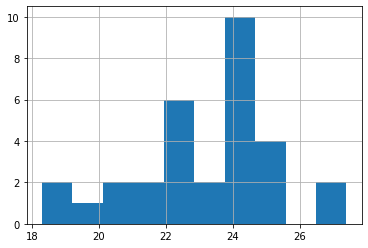

In [26]:
# 畫出氣溫分佈
print(df8['Temperature'].hist())

## 練習

### 練習 1

將台南氣象觀測站資料集所有氣溫從攝氏溫度標準轉成華氏溫度標準：

$$
F = \frac{9}{5} * C + 32
$$

### 練習 2

從台南氣象觀測站資料集中取出高於平均氣溫的資料欄位，並輸出高於平均氣溫總共天數。

In [27]:
# 練習 1 解答

# 溫度轉換公式
def C_to_F(temp):                                     
    return temp * 9 / 5 + 32

# 讀取資料
df9 = pd.read_csv('./data/467410-2020-03.csv', skiprows=1)        

# 套用公式到所有溫度資料
df9['Temperature'] = df9['Temperature'].apply(C_to_F) 
# 套用公式到所有溫度資料
df9['T Max'] = df9['T Max'].apply(C_to_F)             
# 套用公式到所有溫度資料
df9['T Min'] = df9['T Min'].apply(C_to_F)             

# 輸出前 5 筆資料
df9.head(5)                                           

,ObsTime,StnPres,SeaPres,StnPresMax,StnPresMaxTime,StnPresMin,StnPresMinTime,Temperature,T Max,T Max Time,...,PrecpMax60,PrecpMax60Time,SunShine,SunShineRate,GloblRad,VisbMean,EvapA,UVI Max,UVI Max Time,Cloud Amount
0,1,1011.1,1014.3,1012.9,2020-03-01 23:55,1009.5,2020-03-01 14:53,76.10,84.92,2020-03-01 11:04,...,0.0,...,10.3,88.7,20.68,14.3,...,8,2020-03-01 13:00,0.9
1,2,1014.2,1017.3,1016.6,2020-03-02 23:23,1012.2,2020-03-02 03:10,71.78,80.60,2020-03-02 14:48,...,0.0,...,7.5,64.5,18.75,7.4,...,7,2020-03-02 13:00,7.4
2,3,1015.0,1018.1,1017.3,2020-03-03 08:38,1012.0,2020-03-03 15:44,72.68,82.76,2020-03-03 15:21,...,0.0,...,9.7,83.2,20.98,14.4,...,8,2020-03-03 13:00,3.5
3,4,1014.1,1017.2,1016.2,2020-03-04 08:18,1011.3,2020-03-04 15:44,71.60,80.42,2020-03-04 12:32,...,0.0,...,3.1,26.6,15.35,8.3,...,7,2020-03-04 13:00,8.3
4,5,1015.1,1018.3,1017.1,2020-03-05 09:30,1013.1,2020-03-05 14:55,64.94,74.30,2020-03-05 14:38,...,T,2020-03-05 05:05,3.0,25.6,13.87,8.3,...,8,2020-03-05 13:00,8.4


In [28]:
# 練習 2 解答

# 讀取資料
df10 = pd.read_csv('./data/467410-2020-03.csv', skiprows=1)    

# 計算平均氣溫
mean_temp = df10.describe()['Temperature']['mean'] 
# 取出大於平均氣溫的資料
df10 = df10[df10['Temperature'] > mean_temp]       
# 輸出資料數
print(df10.shape[0])                               

18
